# FEEDBACK

- 주피터 노트북만 보고도 이해할 수 있게 <- 발표 "전에" 사람들이 볼 것이기 때문

# 8조 데이터톤 발표
---

## 디즈니플러스의 OTT 시장 진입 전략 수립

![](https://camo.githubusercontent.com/8223fe66d469993550b6c10216e595a15493bcf1d74ab8ecc0e4efdc848306e7/687474703a2f2f66696c65332e696e7374697a2e6e65742f646174612f66696c65332f323032322f30322f30352f372f662f622f37666236613865383163613833346131346366313337393937616464336661332e6a7067)

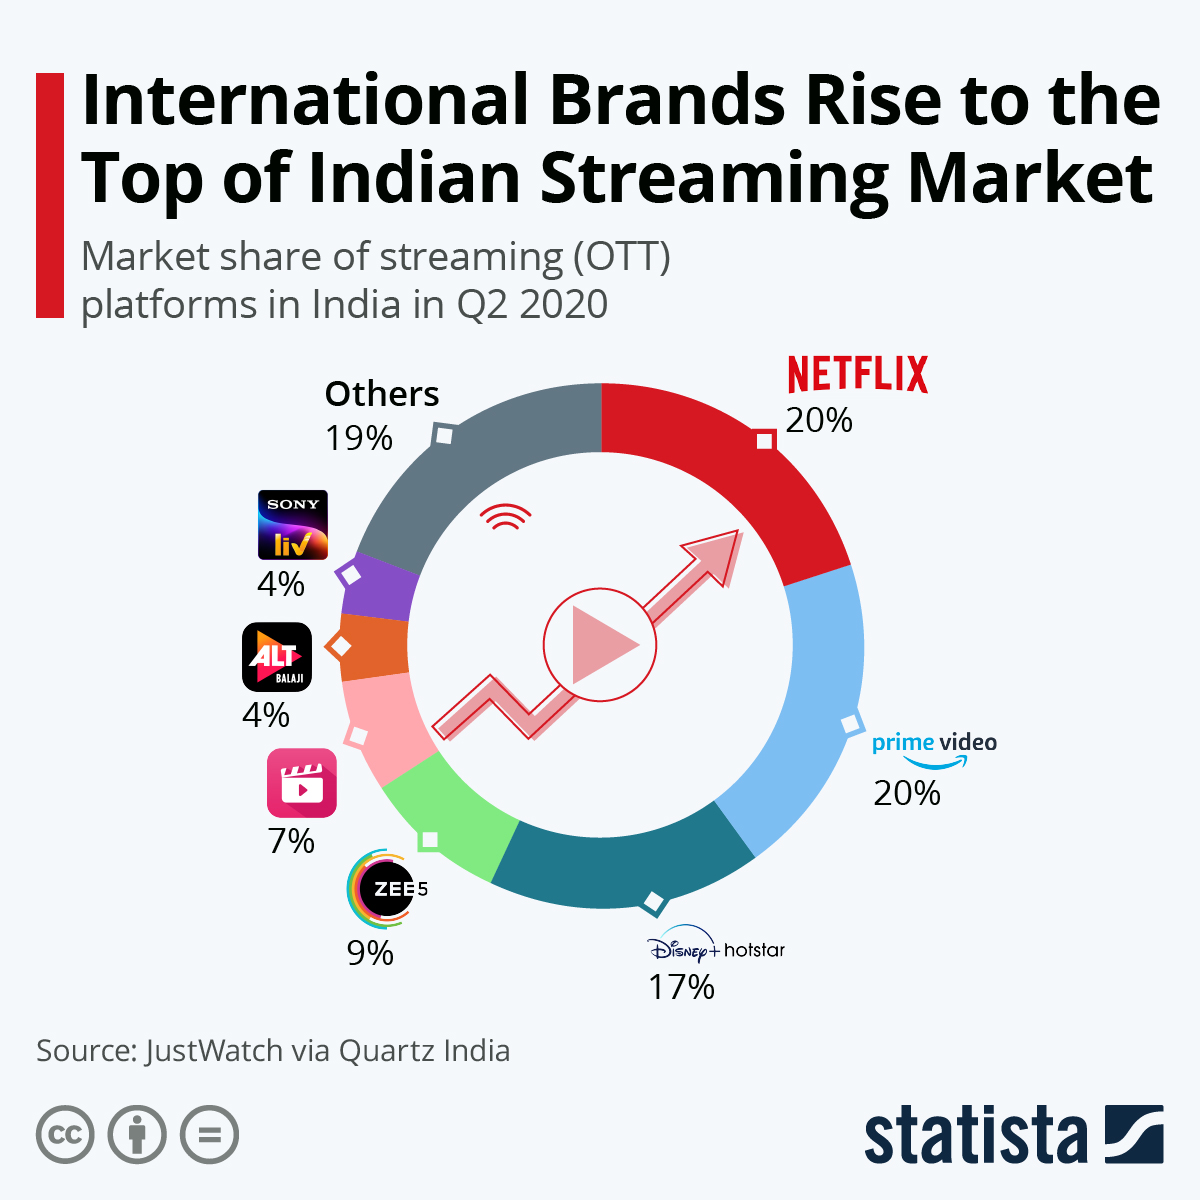

미국 OTT 시장의 점유율을 보면 Netflix, Amazon Prime, Hulu가 높은 순위를 차지하고 있습니다. 
2021년 OTT 시장에 뛰어든 디즈니 플러스는 다른 OTT 플랫폼에 비해 현저히 낮은 점유율인 것을 확인 할 수 있습니다.  

데이터톤 프로젝트를 진행하며 예측하고자 하는 것은 두 가지 입니다.  
- 넷플릭스가 주력하지 않는 장르를 찾아서 디즈니 플러스만의 장점과 결합  
- 2차적으로 장르, 출시된 날짜 미래 동향 예측

## 넷플릭스 장르 데이터 분석
넷플릭스 연도별로 장르를 출시하고 있다 -> 연도별로 데이터를 뽑아보면 넷플릭스가 잘하는 부분에서 컨텐츠가 많이 추가가 됨
이 부분을 넷플릭스가 주력하는 장르라고 판단을 하고 디즈니 플러스가 시장진입을 하기 위해서는 초반의 안정적인 시장진입을 위해 경쟁이 적은 장르로 시작하는 것이 좋다고 판단
넷플릭스의 데이터를 분석해서 상대적으로 콘텐츠 생산이 적은 장르를 알아보고 디즈니 플러스가 잘 활용할 수 있는 장르를 선택하여 해당 장르의 성장성을 예측해보고 디즈니 플러스가 해당 장르에 진입하는 전략을 세움

1. 넷플릭스 연도별 장르별 시각화 분석
2. 넷플릭스 주력하지 않는 장르
3. 디즈니 플러스 장르 시각화 분석
4. 넷플릭스 주력하지 않는 장르와 디즈니플러스의 주력 장르와 비교
5. 장르 선택 후 시장성 예측 (장르의 출시 작품수 추이를 확인/장르 작품 수 확인)
6. 디즈니플러스 OTT 시장 진입 전략 제안

# 준비

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression



# 데이터 불러오기

In [136]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 데이터 처리

## 필요없는 열 삭제

In [137]:
df = netflix_overall.drop(["rating","cast","duration","director","country","description", "release_year"], axis=1 )
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"November 1, 2019","Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"January 11, 2020","Children & Family Movies, Comedies"


In [138]:
# information 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8807 non-null   object
 1   type        8807 non-null   object
 2   title       8807 non-null   object
 3   date_added  8797 non-null   object
 4   listed_in   8807 non-null   object
dtypes: object(5)
memory usage: 344.1+ KB


In [139]:
# null 값 제거
df.dropna(axis='index', how = 'any', subset = ['date_added'], inplace=True)
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"November 1, 2019","Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"January 11, 2020","Children & Family Movies, Comedies"


In [140]:
# 컬럼명 변경
df.rename(columns = {"date_added":"year"}, inplace = True )
df

,show_id,type,title,year,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,"November 1, 2019","Comedies, Horror Movies"
8805,s8806,Movie,Zoom,"January 11, 2020","Children & Family Movies, Comedies"


In [141]:
# 연도만 추출하기
df["year"]= df["year"].apply(lambda x: x.split(", ")[1]).astype(int)
df

,show_id,type,title,year,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,2019,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,2019,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,2020,"Children & Family Movies, Comedies"


In [142]:
# 확인
type(df.iloc[0]["year"])

numpy.int64

In [143]:
# 장르 뽑아내기
df["genre"] = df['listed_in'].apply(lambda x: x.split(", ")[0])

In [144]:
df.head()

,show_id,type,title,year,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows


In [145]:
# 최근 작픔들만 선별 # why? the important thing is the trend!
df = df.loc[df['year'] >= 2017]
df

,show_id,type,title,year,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019,"Cult Movies, Dramas, Thrillers",Cult Movies
8803,s8804,TV Show,Zombie Dumb,2019,"Kids' TV, Korean TV Shows, TV Comedies",Kids' TV
8804,s8805,Movie,Zombieland,2019,"Comedies, Horror Movies",Comedies
8805,s8806,Movie,Zoom,2020,"Children & Family Movies, Comedies",Children & Family Movies


In [146]:
# 장르 수 확인
df['genre'].nunique() 

36

## 1. 넷플릭스 연도별 장르별 시각화 분석


### 장르별 작품 수 확인 & 장르들을 index로 저장


In [147]:
genre_counts = df['genre'] 

genre_list = genre_counts.value_counts()

netflix_genre_list = genre_list

genre_list = genre_list.index

genre_list, genre_list[:5] # genre_list & top 5 rank genres



(Index(['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries',
        'International TV Shows', 'Children & Family Movies', 'Crime TV Shows',
        'Kids' TV', 'Stand-Up Comedy', 'Horror Movies', 'British TV Shows',
        'Docuseries', 'Anime Series', 'International Movies', 'Reality TV',
        'TV Comedies', 'Classic Movies', 'Thrillers', 'TV Dramas', 'Movies',
        'TV Action & Adventure', 'Stand-Up Comedy & Talk Shows',
        'Romantic TV Shows', 'Independent Movies', 'Anime Features',
        'Classic & Cult TV', 'TV Shows', 'Music & Musicals', 'Sci-Fi & Fantasy',
        'Cult Movies', 'TV Horror', 'Romantic Movies',
        'Spanish-Language TV Shows', 'LGBTQ Movies', 'TV Sci-Fi & Fantasy',
        'Sports Movies'],
       dtype='object'),
 Index(['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries',
        'International TV Shows'],
       dtype='object'))


### 연도별 작품 수 확인

In [148]:
grouped = df.groupby('year').count()
year_counts = grouped['genre']
year_counts

year
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: genre, dtype: int64

In [149]:
# 장르별 분리 -> 연도별 counting

year_list = [i for i in range(2017, 2022)]

genre_by_year = {}

for genre in genre_list:
    
    condition = (df['genre'] == genre)
    temp = df.loc[condition]
    temp = temp.groupby('year')['genre']
    temp = temp.count() 
    
    genre_by_year[genre] = temp / year_counts * 100

netflix_genre_by_year = genre_by_year
netflix_genre_by_year

{'Dramas': year
 2017    16.835017
 2018    21.346270
 2019    18.105159
 2020    18.414050
 2021    17.489987
 Name: genre, dtype: float64,
 'Comedies': year
 2017    11.447811
 2018    14.796847
 2019    14.186508
 2020    16.072379
 2021    13.417891
 Name: genre, dtype: float64,
 'Action & Adventure': year
 2017     8.164983
 2018    10.491207
 2019    10.019841
 2020     9.047366
 2021    13.084112
 Name: genre, dtype: float64,
 'Documentaries': year
 2017    15.740741
 2018     9.884779
 2019     9.226190
 2020     5.694518
 2021     6.408545
 Name: genre, dtype: float64,
 'International TV Shows': year
 2017    11.363636
 2018     6.670710
 2019     9.474206
 2020     8.195849
 2021     8.611482
 Name: genre, dtype: float64,
 'Children & Family Movies': year
 2017    6.481481
 2018    4.851425
 2019    6.746032
 2020    8.408728
 2021    7.743658
 Name: genre, dtype: float64,
 'Crime TV Shows': year
 2017    4.124579
 2018    4.730139
 2019    4.761905
 2020    4.789782
 2021   

### 그래프를 통해 시각화

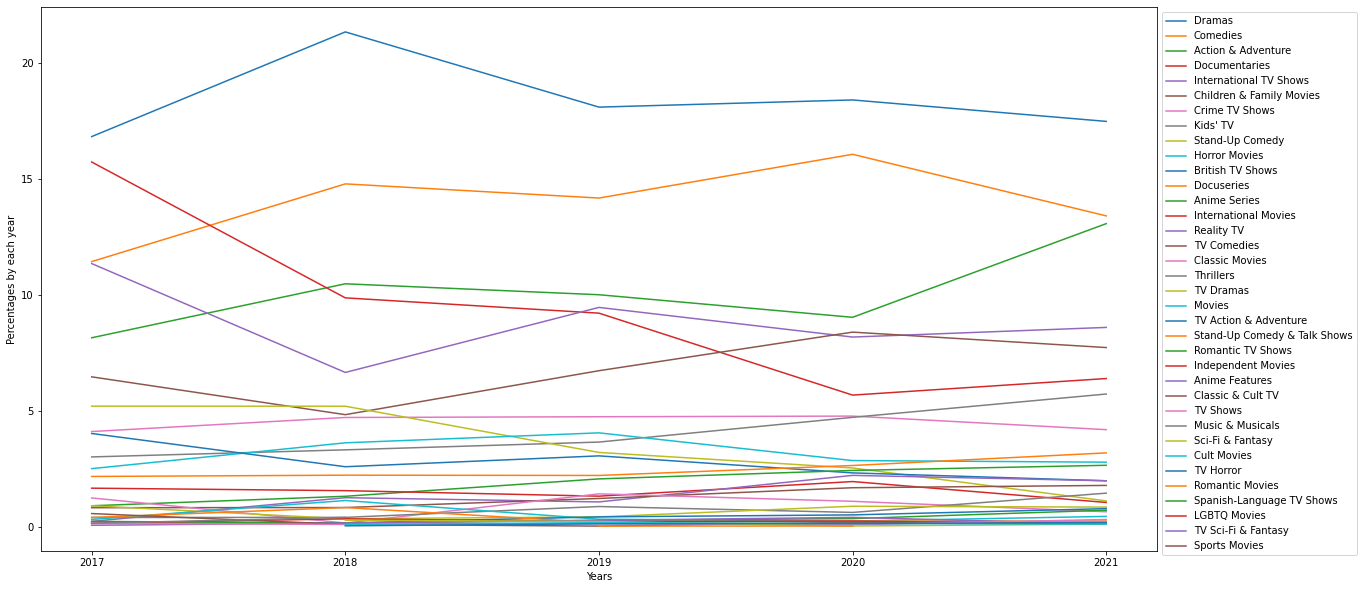

In [150]:
plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, genre_by_year.get(genre))   

plt.xlabel("Years")
plt.ylabel("Percentages by each year")

plt.xticks(year_list)

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

# Comment!

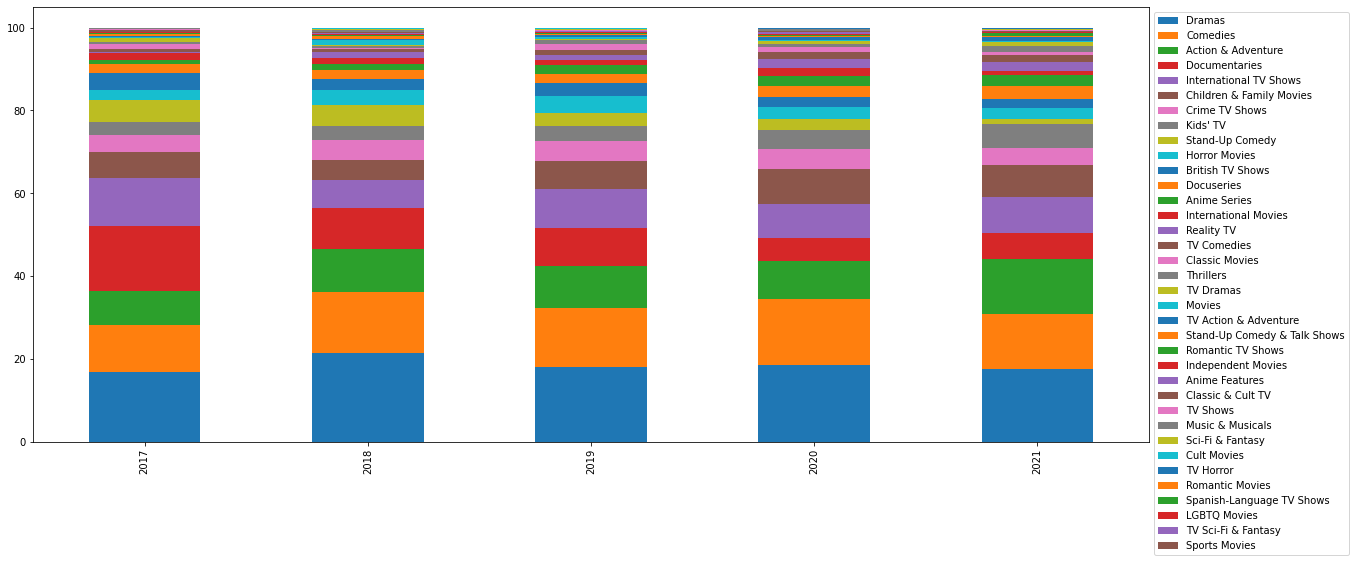

In [151]:
x = year_list
y = genre_by_year

what = pd.DataFrame(y, index= x)

what.plot(kind='bar', stacked = True, figsize = (20,8))
plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

## 2. 넷플릭스 주력하지 않는 장르


## 3. 디즈니 플러스 장르별 시각화 분석
### 디즈니데이터 불러오기

In [152]:
disney = pd.read_csv("disney_plus_titles.csv")
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [153]:
def preprocess_data(df):
    df = df[["show_id","title", "type", "date_added","listed_in"]] # 열 추출
    
    df.dropna(axis='index', how = 'any', subset = ['date_added'], inplace=True) # null 제거

    df.rename(columns = {"date_added":"year"}, inplace = True )  # 컬럼명 변경, 연도만 추출

    df["year"]= df["year"].apply(lambda x: x.split(", ")[1]).astype(int) # 연도만 추출하기

    df["genre"] = df['listed_in'].apply(lambda x: x.split(", ")[0]) # 장르 뽑아내기

    df = df.loc[df['year'] >= 2017] # 최근 작픔들만 선별 # why? the important thing is the trend!
    
    return df

In [154]:
disney = preprocess_data(disney)
disney

,show_id,title,type,year,listed_in,genre
0,s1,Duck the Halls: A Mickey Mouse Christmas Special,Movie,2021,"Animation, Family",Animation
1,s2,Ernest Saves Christmas,Movie,2021,Comedy,Comedy
2,s3,Ice Age: A Mammoth Christmas,Movie,2021,"Animation, Comedy, Family",Animation
3,s4,The Queen Family Singalong,Movie,2021,Musical,Musical
4,s5,The Beatles: Get Back,TV Show,2021,"Docuseries, Historical, Music",Docuseries
...,...,...,...,...,...,...
1445,s1446,X-Men Origins: Wolverine,Movie,2021,"Action-Adventure, Family, Science Fiction",Action-Adventure
1446,s1447,Night at the Museum: Battle of the Smithsonian,Movie,2021,"Action-Adventure, Comedy, Family",Action-Adventure
1447,s1448,Eddie the Eagle,Movie,2020,"Biographical, Comedy, Drama",Biographical
1448,s1449,Bend It Like Beckham,Movie,2020,"Buddy, Comedy, Coming of Age",Buddy


### 그래프 그리기

In [155]:
def show_graph(df):
    global temp_genre_list, genre_by_year
    # genre indexing
    genre_counts = df['genre'] 
    genre_list = genre_counts.value_counts()
    temp_genre_list = genre_list
    genre_list = genre_list.index
    print(genre_list)
    
    # year indexing
    grouped = df.groupby('year').count()
    year_counts = grouped['genre']
    print(year_counts)
    
    # year
    year_list = year_counts.index
    print(year_list)
    
    genre_by_year = {}
    
    for genre in genre_list:
    
        condition = (df['genre'] == genre)
        temp = df.loc[condition]
        temp = temp.groupby('year')['genre']
        temp = temp.count() 
    
        genre_by_year[genre] = temp / year_counts * 100
        
    plt.figure(figsize = (20,10))

    for genre in genre_list:
        plt.plot(year_list, genre_by_year.get(genre))   

    plt.xlabel("Years")
    plt.ylabel("Percentages by each year")

    plt.xticks(year_list)

    plt.legend(genre_list, bbox_to_anchor = (1,1))
    plt.show()
    
    return df

Index(['Action-Adventure', 'Animation', 'Comedy', 'Animals & Nature',
       'Documentary', 'Coming of Age', 'Biographical', 'Docuseries', 'Drama',
       'Buddy', 'Family', 'Anthology', 'Fantasy', 'Concert Film', 'Reality',
       'Movies', 'Crime', 'Series', 'Historical', 'Musical', 'Science Fiction',
       'Kids', 'Talk Show', 'Game Show / Competition', 'Variety', 'Dance',
       'Lifestyle', 'Sports', 'Music'],
      dtype='object')
year
2019    765
2020    352
2021    330
Name: genre, dtype: int64
Int64Index([2019, 2020, 2021], dtype='int64', name='year')


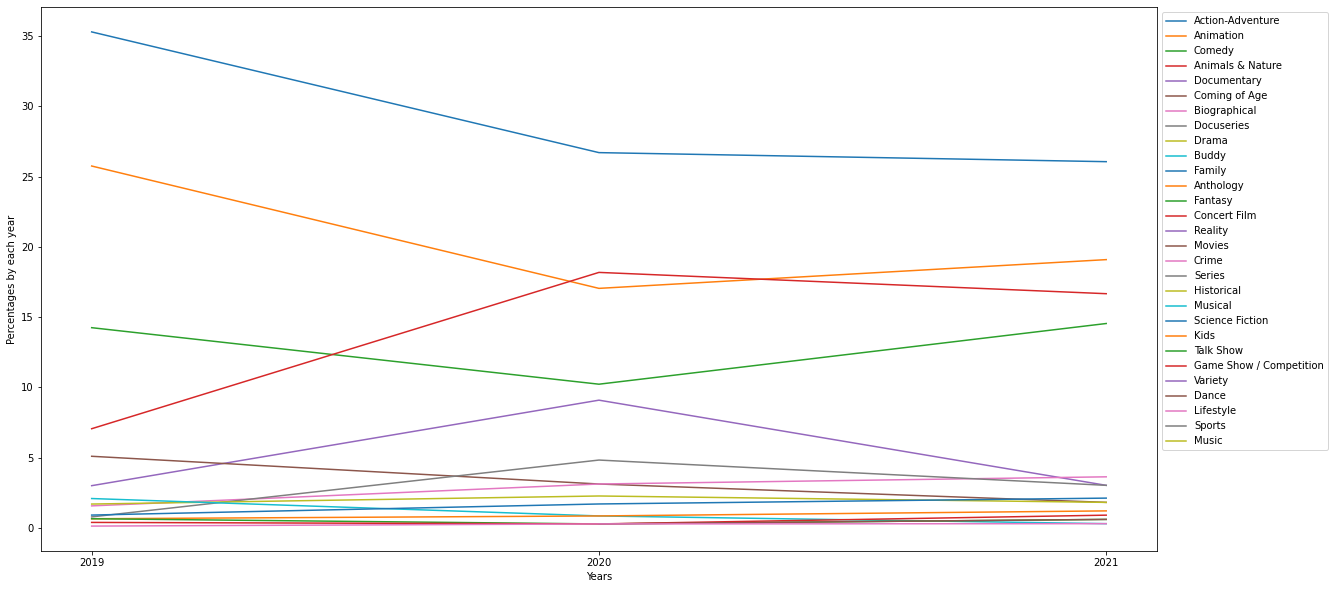

In [156]:
show_graph(disney)
disney_genre_by_year = genre_by_year
print()

### 번외: HULU는 어떨까요?<나중에 지워주세요>

In [164]:
hulu = pd.read_csv("hulu_titles.csv")
hulu = preprocess_data(hulu)
hulu

,show_id,title,type,year,listed_in,genre
0,s1,Ricky Velez: Here's Everything,Movie,2021,"Comedy, Stand Up",Comedy
1,s2,Silent Night,Movie,2021,"Crime, Drama, Thriller",Crime
2,s3,The Marksman,Movie,2021,"Action, Thriller",Action
3,s4,Gaia,Movie,2021,Horror,Horror
4,s5,Settlers,Movie,2021,"Science Fiction, Thriller",Science Fiction
...,...,...,...,...,...,...
2768,s2769,JoJo’s Bizarre Adventure,TV Show,2017,"Action, Adventure, Anime",Action
2769,s2770,Terraformars,TV Show,2017,"Action, Adventure, Anime",Action
2770,s2771,Please Like Me,TV Show,2017,"Comedy, Drama, International",Comedy
2771,s2772,Sleepy Hollow,TV Show,2017,"Adventure, Drama, Mystery",Adventure


Index(['Action', 'Documentaries', 'Comedy', 'Drama', 'Horror', 'Crime',
       'Black Stories', 'Anime', 'Cooking & Food', 'Sports', 'Reality', 'News',
       'Adventure', 'Family', 'Lifestyle & Culture', 'Kids', 'Adult Animation',
       'Game Shows', 'Thriller', 'Classics', 'Latino', 'Science Fiction',
       'Cartoons', 'International', 'Music', 'Romance', 'Science & Technology',
       'History', 'Mystery', 'Health & Wellness'],
      dtype='object')
year
2017     197
2018     270
2019     406
2020     815
2021    1085
Name: genre, dtype: int64
Int64Index([2017, 2018, 2019, 2020, 2021], dtype='int64', name='year')


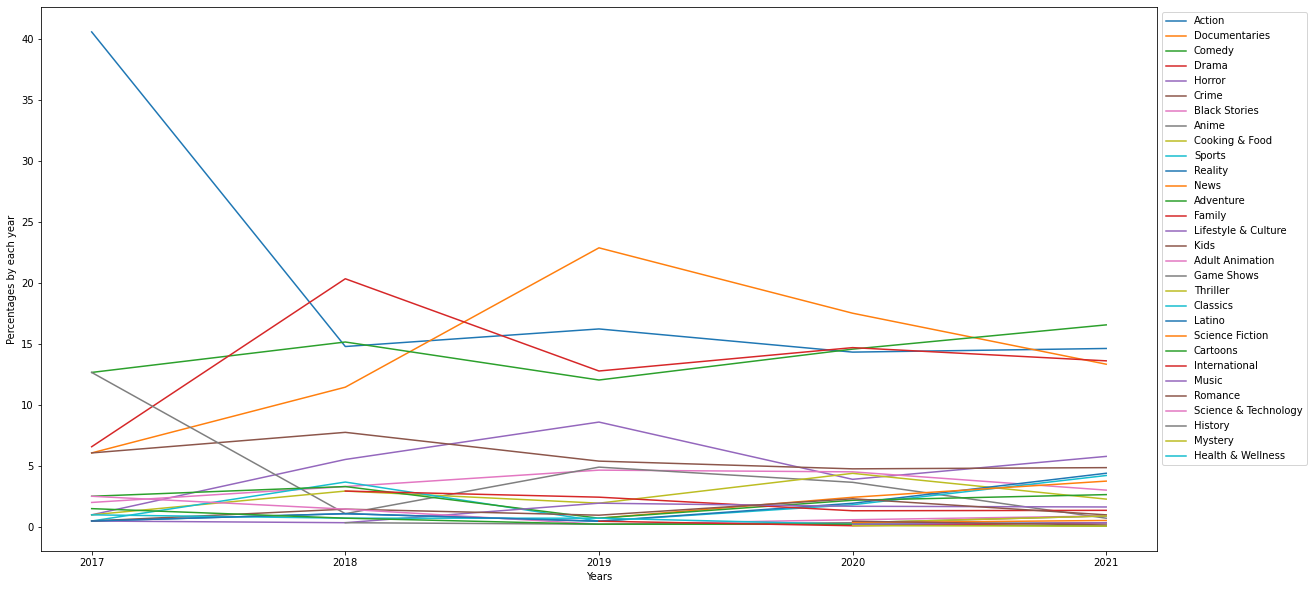

In [165]:
show_graph(hulu)
hulu_genre_by_year = genre_by_year
print()

## 4. 넷플릭스 주력하지 않는 장르와 디즈니플러스의 주력 장르와 비교


### 주력하는 순서대로 장르를 출력

In [160]:
netflix_genre_list

Dramas                          1525
Comedies                        1169
Action & Adventure               838
Documentaries                    739
International TV Shows           719
Children & Family Movies         567
Crime TV Shows                   376
Kids' TV                         340
Stand-Up Comedy                  278
Horror Movies                    268
British TV Shows                 227
Docuseries                       206
Anime Series                     161
International Movies             126
Reality TV                       118
TV Comedies                      108
Classic Movies                    78
Thrillers                         64
TV Dramas                         56
Movies                            42
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      32
Romantic TV Shows                 30
Independent Movies                20
Anime Features                    20
Classic & Cult TV                 17
TV Shows                          14
M

In [161]:
disney_genre_list

Action-Adventure           450
Animation                  320
Comedy                     193
Animals & Nature           173
Documentary                 65
Coming of Age               56
Biographical                35
Docuseries                  33
Drama                       27
Buddy                       20
Family                      20
Anthology                   12
Fantasy                      8
Concert Film                 7
Reality                      4
Movies                       3
Crime                        3
Series                       3
Historical                   2
Musical                      2
Science Fiction              2
Kids                         2
Talk Show                    1
Game Show / Competition      1
Variety                      1
Dance                        1
Lifestyle                    1
Sports                       1
Music                        1
Name: genre, dtype: int64

## 5. 장르 선택 후 시장성 예측
### 5-1. 선택한 장르의 출시 작품수 추이를 확인

In [162]:
netflix_genre_by_year #train data

{'Dramas': year
 2017    16.835017
 2018    21.346270
 2019    18.105159
 2020    18.414050
 2021    17.489987
 Name: genre, dtype: float64,
 'Comedies': year
 2017    11.447811
 2018    14.796847
 2019    14.186508
 2020    16.072379
 2021    13.417891
 Name: genre, dtype: float64,
 'Action & Adventure': year
 2017     8.164983
 2018    10.491207
 2019    10.019841
 2020     9.047366
 2021    13.084112
 Name: genre, dtype: float64,
 'Documentaries': year
 2017    15.740741
 2018     9.884779
 2019     9.226190
 2020     5.694518
 2021     6.408545
 Name: genre, dtype: float64,
 'International TV Shows': year
 2017    11.363636
 2018     6.670710
 2019     9.474206
 2020     8.195849
 2021     8.611482
 Name: genre, dtype: float64,
 'Children & Family Movies': year
 2017    6.481481
 2018    4.851425
 2019    6.746032
 2020    8.408728
 2021    7.743658
 Name: genre, dtype: float64,
 'Crime TV Shows': year
 2017    4.124579
 2018    4.730139
 2019    4.761905
 2020    4.789782
 2021   

In [167]:
disney_genre_by_year #train data

{'Action-Adventure': year
 2019    35.294118
 2020    26.704545
 2021    26.060606
 Name: genre, dtype: float64,
 'Animation': year
 2019    25.751634
 2020    17.045455
 2021    19.090909
 Name: genre, dtype: float64,
 'Comedy': year
 2019    14.248366
 2020    10.227273
 2021    14.545455
 Name: genre, dtype: float64,
 'Animals & Nature': year
 2019     7.058824
 2020    18.181818
 2021    16.666667
 Name: genre, dtype: float64,
 'Documentary': year
 2019    3.006536
 2020    9.090909
 2021    3.030303
 Name: genre, dtype: float64,
 'Coming of Age': year
 2019    5.098039
 2020    3.125000
 2021    1.818182
 Name: genre, dtype: float64,
 'Biographical': year
 2019    1.568627
 2020    3.125000
 2021    3.636364
 Name: genre, dtype: float64,
 'Docuseries': year
 2019    0.784314
 2020    4.829545
 2021    3.030303
 Name: genre, dtype: float64,
 'Drama': year
 2019    1.699346
 2020    2.272727
 2021    1.818182
 Name: genre, dtype: float64,
 'Buddy': year
 2019    2.091503
 2020    0.

### 5.2 선택한 장르 작품 수 추세 확인

## 6. 디즈니플러스 OTT 시장 진입 전략 제안